In [ ]:
!pwd

/content


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
!git clone https://github.com/AlexeyAB/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 15502, done.
remote: Total 15502 (delta 0), reused 0 (delta 0), pack-reused 15502
Receiving objects: 100% (15502/15502), 14.16 MiB | 8.42 MiB/s, done.
Resolving deltas: 100% (10405/10405), done.


In [2]:
!pwd

/content


In [3]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


In [4]:
cd /content/darknet

/content/darknet


In [5]:
!ls

3rdparty		darknet_video.py       net_cam_v4.sh
build			data		       README.md
build.ps1		image_yolov3.sh        results
cfg			image_yolov4.sh        scripts
cmake			include		       src
CMakeLists.txt		json_mjpeg_streams.sh  vcpkg.json
DarknetConfig.cmake.in	LICENSE		       video_yolov3.sh
darknet_images.py	Makefile	       video_yolov4.sh
darknet.py		net_cam_v3.sh


In [6]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
  

In [ ]:
!ls

3rdparty	DarknetConfig.cmake.in	json_mjpeg_streams.sh  scripts
backup		darknet_images.py	LICENSE		       src
build		darknet.py		Makefile	       vcpkg.json
build.ps1	darknet_video.py	net_cam_v3.sh	       video_yolov3.sh
cfg		data			net_cam_v4.sh	       video_yolov4.sh
cmake		image_yolov3.sh		obj
CMakeLists.txt	image_yolov4.sh		README.md
darknet		include			results


In [ ]:
! ./darknet

usage: ./darknet <function>


In [ ]:
!wget https://pjreddie.com/media/files/darknet19_448.conv.23

--2022-11-30 18:40:40--  https://pjreddie.com/media/files/darknet19_448.conv.23
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79327120 (76M) [application/octet-stream]
Saving to: ‘darknet19_448.conv.23’

darknet19_448.conv. 100%[===================>]  75.65M  17.1MB/s    in 5.4s    

2022-11-30 18:40:46 (14.0 MB/s) - ‘darknet19_448.conv.23’ saved [79327120/79327120]



In [ ]:
!python train_test.py

/content/darknet


In [ ]:
!./darknet detector train cfg/obj.data cfg/yolo-voc.2.0.cfg darknet19_448.conv.23 -dont_show 0

Streaming output truncated to the last 5000 lines.
 1616: 0.203437, 0.211904 avg loss, 0.000010 rate, 1.968586 seconds, 103424 images, 0.264327 hours left
Loaded: 0.000054 seconds
Region Avg IOU: 0.830318, Class: 1.000000, Obj: 0.639241, No Obj: 0.010815, Avg Recall: 1.000000,  count: 24
Region Avg IOU: 0.834280, Class: 1.000000, Obj: 0.655546, No Obj: 0.012026, Avg Recall: 1.000000,  count: 21
Region Avg IOU: 0.816739, Class: 1.000000, Obj: 0.620663, No Obj: 0.009594, Avg Recall: 1.000000,  count: 17
Region Avg IOU: 0.799500, Class: 1.000000, Obj: 0.601399, No Obj: 0.009072, Avg Recall: 1.000000,  count: 14
Region Avg IOU: 0.840601, Class: 1.000000, Obj: 0.634424, No Obj: 0.010270, Avg Recall: 1.000000,  count: 18
Region Avg IOU: 0.774896, Class: 1.000000, Obj: 0.486511, No Obj: 0.010579, Avg Recall: 0.956522,  count: 23
Region Avg IOU: 0.838455, Class: 1.000000, Obj: 0.563388, No Obj: 0.006768, Avg Recall: 1.000000,  count: 11
Region Avg IOU: 0.804789, Class: 1.000000, Obj: 0.665170,

In [ ]:
!pwd

/content/darknet


In [ ]:
!./darknet detector map /content/darknet/cfg/yolo-voc.2.0.cfg /content/gdrive/MyDrive/backup/yolo-voc_final.weights

 CUDA-version: 11020 (11020), cuDNN: 8.1.1, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
valid: Using default 'data/train.txt'
names: Using default 'data/names.list'
Couldn't open file: data/names.list


In [ ]:
# define helper functions that will allow you to show the image in your Colab Notebook after running your detections
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# show image using our helper function
# imShow('predictions.jpg')

 CUDA-version: 11020 (11020), cuDNN: 8.1.1, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 max                2x 2/ 2    416 x 416 x  32 ->  208 x 208 x  32 0.006 BF
   2 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   3 max                2x 2/ 2    208 x 208 x  64 ->  104 x 104 x  64 0.003 BF
   4 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   5 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   6 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   7 max                2x 2/ 2    104 x 104 x 128 ->   52 x  52 x 128 

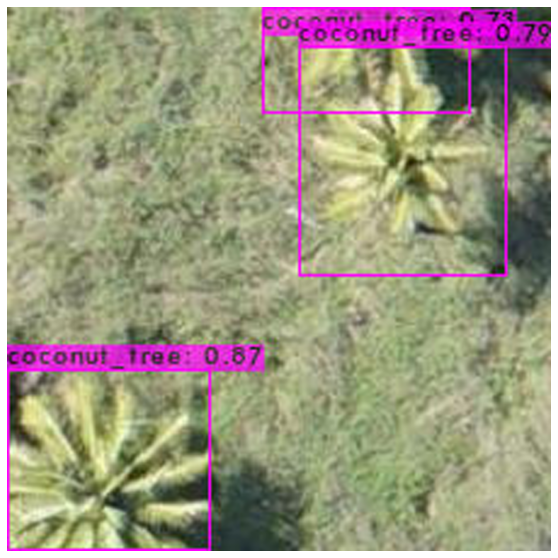

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test /content/darknet/cfg/obj.data /content/darknet/cfg/yolo-voc.2.0.cfg /content/gdrive/MyDrive/backup/yolo-voc_last.weights /content/darknet/dataset/000000.jpg -thresh 0.3
imShow('predictions.jpg')

In [ ]:
!python save_model.py --weights ./content/gdrive/MyDrive/Saplings/Coconut-Tree-Detection/backup/yolo-voc_last.weights --output ./checkpoints/Coconut-416 --input_size 416 --model yolov4 

In [ ]:
import glob
count = 0
for i in glob.glob("data/test/*.jpg"):
  !./darknet detector test data/obj.data cfg/yolov4-obj.cfg /content/gdrive/MyDrive/Object_Detection/backup/yolov4-obj_last.weights {i} -thresh 0.3
  filename = f'{count}.jpg'
  !mv predictions.jpg /content/gdrive/MyDrive/Object_Detection/predictions/{filename}
  print(count,i)
  count += 1

In [ ]:
import numpy as np
import time
import cv2
import imutils
from imutils.video import FPS
from imutils.video import VideoStream



INPUT_FILE='/content/coconut.mp4'
OUTPUT_FILE='output.avi'
LABELS_FILE='/content/darknet/cfg/obj.names'
CONFIG_FILE='/content/darknet/cfg/yolo-voc.2.0.cfg'
WEIGHTS_FILE='/content/gdrive/MyDrive/Saplings/Coconut-Tree-Detection/backup/yolo-voc_last.weights'
CONFIDENCE_THRESHOLD=0.3

H=None
W=None

fps = FPS().start()

fourcc = cv2.VideoWriter_fourcc(*"MJPG")
writer = cv2.VideoWriter(OUTPUT_FILE, fourcc, 30,
	(800, 600), True)

LABELS = open(LABELS_FILE).read().strip().split("\n")

np.random.seed(4)
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3),
	dtype="uint8")


net = cv2.dnn.readNetFromDarknet(CONFIG_FILE, WEIGHTS_FILE)

vs = cv2.VideoCapture(INPUT_FILE)


# determine only the *output* layer names that we need from YOLO
ln = net.getLayerNames()
ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]

cnt =0;
while True:
	cnt+=1
	print ("Frame number", cnt)
	try:
		(grabbed, image) = vs.read()
	except:
		break
	blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416),
		swapRB=True, crop=False)
	net.setInput(blob)
	if W is None or H is None:
		(H, W) = image.shape[:2]
	layerOutputs = net.forward(ln)






	# initialize our lists of detected bounding boxes, confidences, and
	# class IDs, respectively
	boxes = []
	confidences = []
	classIDs = []

	# loop over each of the layer outputs
	for output in layerOutputs:
		# loop over each of the detections
		for detection in output:
			# extract the class ID and confidence (i.e., probability) of
			# the current object detection
			scores = detection[5:]
			classID = np.argmax(scores)
			confidence = scores[classID]

			# filter out weak predictions by ensuring the detected
			# probability is greater than the minimum probability
			if confidence > CONFIDENCE_THRESHOLD:
				# scale the bounding box coordinates back relative to the
				# size of the image, keeping in mind that YOLO actually
				# returns the center (x, y)-coordinates of the bounding
				# box followed by the boxes' width and height
				box = detection[0:4] * np.array([W, H, W, H])
				(centerX, centerY, width, height) = box.astype("int")

				# use the center (x, y)-coordinates to derive the top and
				# and left corner of the bounding box
				x = int(centerX - (width / 2))
				y = int(centerY - (height / 2))

				# update our list of bounding box coordinates, confidences,
				# and class IDs
				boxes.append([x, y, int(width), int(height)])
				confidences.append(float(confidence))
				classIDs.append(classID)

	# apply non-maxima suppression to suppress weak, overlapping bounding
	# boxes
	idxs = cv2.dnn.NMSBoxes(boxes, confidences, CONFIDENCE_THRESHOLD,
		CONFIDENCE_THRESHOLD)

	# ensure at least one detection exists
	if len(idxs) > 0:
		# loop over the indexes we are keeping
		for i in idxs.flatten():
			# extract the bounding box coordinates
			(x, y) = (boxes[i][0], boxes[i][1])
			(w, h) = (boxes[i][2], boxes[i][3])

			color = [int(c) for c in COLORS[classIDs[i]]]

			cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
			text = "{}: {:.4f}".format(LABELS[classIDs[i]], confidences[i])
			cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,
				0.5, color, 2)

	# show the output image
	# cv2.imshow("output", cv2.resize(image,(800, 600)))
	writer.write(cv2.resize(image,(800, 600)))
	fps.update()
	key = cv2.waitKey(1) & 0xFF
	if key == ord("q"):
		break

fps.stop()

print("[INFO] elasped time: {:.2f}".format(fps.elapsed()))
print("[INFO] approx. FPS: {:.2f}".format(fps.fps()))

# do a bit of cleanup
cv2.destroyAllWindows()

# release the file pointers
print("[INFO] cleaning up...")
writer.release()
vs.release()

Frame number 1
Frame number 2
Frame number 3
Frame number 4
Frame number 5
Frame number 6
Frame number 7
Frame number 8
Frame number 9
Frame number 10
Frame number 11
Frame number 12
Frame number 13
Frame number 14
Frame number 15
Frame number 16
Frame number 17
Frame number 18
Frame number 19
Frame number 20
Frame number 21
Frame number 22
Frame number 23
Frame number 24
Frame number 25
Frame number 26
Frame number 27
Frame number 28
Frame number 29
Frame number 30
Frame number 31
Frame number 32
Frame number 33
Frame number 34
Frame number 35
Frame number 36
Frame number 37
Frame number 38
Frame number 39
Frame number 40
Frame number 41
Frame number 42
Frame number 43
Frame number 44
Frame number 45
Frame number 46
Frame number 47
Frame number 48
Frame number 49
Frame number 50
Frame number 51
Frame number 52
Frame number 53
Frame number 54
Frame number 55
Frame number 56
Frame number 57
Frame number 58
Frame number 59
Frame number 60
Frame number 61
Frame number 62
Frame number 63
F

error: ignored